<a href="https://colab.research.google.com/github/Vinod1403/IIIT-Hyderabad-Tutorials/blob/main/Copy_of_STP_Module_01_Lab_04_Transforming_data_using_linear_algebra_by_Om.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Transforming data using linear algebra



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
import itertools
import pandas as pd

In [2]:
def plotGrid(transform, unit, linestyle=":", fig=None, ax=None):
    lim1 = -100
    lim2 = 100

    def mat2xy(start, end):
        if len(start.shape) == 1:
            start = np.expand_dims(start, 0)
            end = np.expand_dims(end, 0)
        nan = np.ones(len(start)) * np.nan
        x = np.stack((start[:, 0], end[:, 0], nan)).T.reshape(-1)
        y = np.stack((start[:, 1], end[:, 1], nan)).T.reshape(-1)
        return x, y

    def parallellines(axis, addend, lines, unit):
        addend = np.repeat(np.expand_dims(addend, 0), lines * 2, 0)
        unit = np.expand_dims(np.arange(-lines, lines) * unit, 1)
        unit = unit - lines
        addend = addend * unit
        lines = np.expand_dims(axis, 0) + addend
        return np.concatenate((lines, lines * -1))

    if fig is None:
        fig, ax = plt.subplots(figsize=(5, 5))
    transform = transform.astype(float)
    xaxis = transform[0]
    yaxis = transform[1]
    lines1 = parallellines(xaxis * lim1, yaxis, 100, unit)
    lines2 = parallellines(xaxis * lim2, yaxis, 100, unit)
    x, y = mat2xy(lines1, lines2)
    plt.plot(x, y, linestyle + "k", linewidth=0.5)
    # plot x axis
    x, y = mat2xy(xaxis * lim1, xaxis * lim2)
    plt.plot(x, y, linestyle, color="#440077")
    lines1 = parallellines(yaxis * lim1, xaxis, 100, unit)
    lines2 = parallellines(yaxis * lim2, xaxis, 100, unit)
    x, y = mat2xy(lines1, lines2)
    plt.plot(x, y, linestyle + "k", linewidth=0.5)
    # plot y axis
    x, y = mat2xy(yaxis * lim1, yaxis * lim2)
    plt.plot(x, y, linestyle, color="#aa5500")

    return fig, ax
def plotData(X, y, xlabel="feat1", ylabel="feat2", fig=None, ax=None):
    if fig is None:
        fig, ax = plt.subplots()
    nclasses_local = len(np.unique(y))
    for ii in range(nclasses_local):
        plt.scatter(X[y == ii, 0], X[y == ii, 1])
    plt.legend([str(i) for i in range(nclasses_local)])
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    return fig, ax

In [3]:
T0 = np.array([[1, 0], [0, 1]])
T1 = np.array([[1.2, 0.5], [-0.8, 1.5]])
data1 = np.array([5, 4])
data0 = np.matmul(T1, data1)
print("Data in T0 =", data1)
print("Data in T1 =", data0)

Data in T0 = [5 4]
Data in T1 = [8. 2.]


We can visualize this below. T0 is shown with dotted lines and T1 is shown with solid lines.

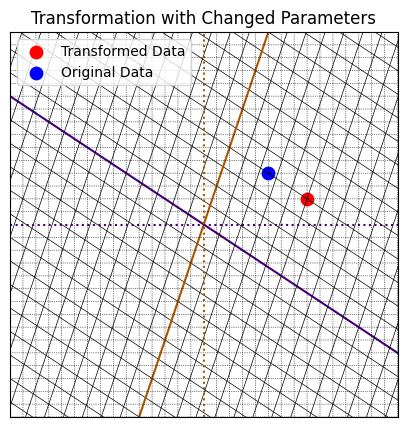

In [4]:
fig, ax = plotGrid(T1.T, 1, "-")
plotGrid(T0.T, 1, fig=fig, ax=ax)
plt.scatter(data0[0], data0[1], color='red', s=80, label='Transformed Data')
plt.scatter(data1[0], data1[1], color='blue', s=80, label='Original Data')
ax.set_xlim(-15, 15)
ax.set_ylim(-15, 15)
ax.set_xticks([])
ax.set_yticks([])
plt.legend()
plt.title("Transformation with Changed Parameters")
plt.show()

In [5]:
data0_a = np.matmul(T1, data1)
data0_b = np.matmul(data1, T1.T)
print(data0_a)
print(data0_b)

[8. 2.]
[8. 2.]


In [6]:
A1 = np.array([3, 3])
B1 = np.array([2, -5])
C1 = np.array([1, -1])
A0 = np.matmul(T1, A1)
B0 = np.matmul(T1, B1)
C0 = np.matmul(T1, C1)
def dist(a, b):
    diff = a - b
    sq = diff * diff
    return np.sqrt(sq.sum())
# distance between the points in T1
print("Distance between A and B in T1 = ", dist(A1, B1))
print("Distance between B and C in T1 = ", dist(B1, C1))
print("Distance between A and C in T1 = ", dist(A1, C1))
print("")
# distnace between the points in T0
print("Distance between A and B in T0 = ", dist(A0, B0))
print("Distance between B and C in T0 = ", dist(B0, C0))
print("Distance between A and C in T0 = ", dist(A0, C0))

Distance between A and B in T1 =  8.06225774829855
Distance between B and C in T1 =  4.123105625617661
Distance between A and C in T1 =  4.47213595499958

Distance between A and B in T0 =  12.348279232346504
Distance between B and C in T0 =  6.846897107449475
Distance between A and C in T0 =  6.2225396744416175


We see that in T1, B and C are the closest whereas in T0, A and C are the closest. These kinds of changes will affect the predictions returned by the nearest neighbour algorithm.

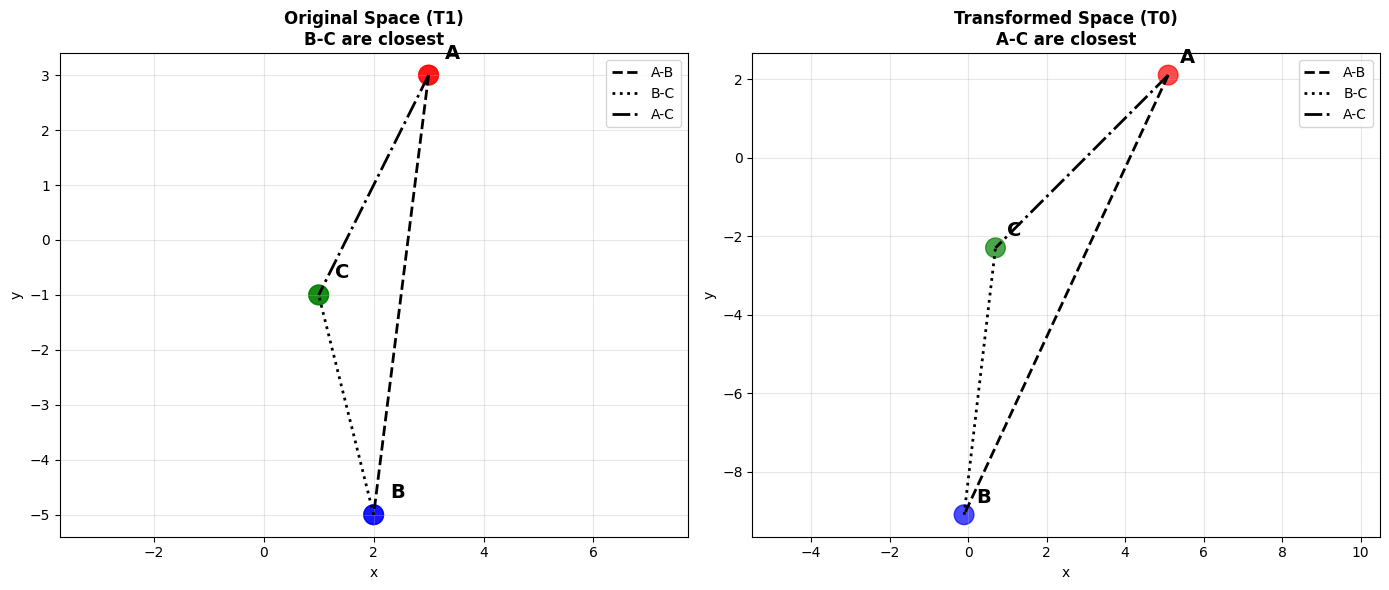

DISTANCE COMPARISON SUMMARY

In T1 Space:
  A-B distance: 8.06
  B-C distance: 4.12 ← SHORTEST
  A-C distance: 4.47

In T0 Space (after transformation):
  A-B distance: 12.35
  B-C distance: 6.85
  A-C distance: 6.22 ← SHORTEST

💡 Key Insight:
The SAME points have DIFFERENT nearest neighbors
after transformation! This directly affects K-NN predictions.


In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
ax1.scatter([A1[0], B1[0], C1[0]], [A1[1], B1[1], C1[1]],
            s=200, c=['red', 'blue', 'green'], alpha=0.7)
ax1.plot([A1[0], B1[0]], [A1[1], B1[1]], 'k--', linewidth=2, label='A-B')
ax1.plot([B1[0], C1[0]], [B1[1], C1[1]], 'k:', linewidth=2, label='B-C')
ax1.plot([A1[0], C1[0]], [A1[1], C1[1]], 'k-.', linewidth=2, label='A-C')
ax1.scatter([A1[0], B1[0], C1[0]], [A1[1], B1[1], C1[1]],
            s=200, c=['red', 'blue', 'green'], alpha=0.7)
ax1.text(A1[0]+0.3, A1[1]+0.3, 'A', fontsize=14, fontweight='bold')
ax1.text(B1[0]+0.3, B1[1]+0.3, 'B', fontsize=14, fontweight='bold')
ax1.text(C1[0]+0.3, C1[1]+0.3, 'C', fontsize=14, fontweight='bold')
ax1.set_title('Original Space (T1)\nB-C are closest', fontsize=12, fontweight='bold')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.grid(True, alpha=0.3)
ax1.legend()
ax1.axis('equal')
ax2.scatter([A0[0], B0[0], C0[0]], [A0[1], B0[1], C0[1]],
            s=200, c=['red', 'blue', 'green'], alpha=0.7)
ax2.plot([A0[0], B0[0]], [A0[1], B0[1]], 'k--', linewidth=2, label='A-B')
ax2.plot([B0[0], C0[0]], [B0[1], C0[1]], 'k:', linewidth=2, label='B-C')
ax2.plot([A0[0], C0[0]], [A0[1], C0[1]], 'k-.', linewidth=2, label='A-C')
ax2.text(A0[0]+0.3, A0[1]+0.3, 'A', fontsize=14, fontweight='bold')
ax2.text(B0[0]+0.3, B0[1]+0.3, 'B', fontsize=14, fontweight='bold')
ax2.text(C0[0]+0.3, C0[1]+0.3, 'C', fontsize=14, fontweight='bold')
ax2.set_title('Transformed Space (T0)\nA-C are closest', fontsize=12, fontweight='bold')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.grid(True, alpha=0.3)
ax2.legend()
ax2.axis('equal')

plt.tight_layout()
plt.show()
print("="*60)
print("DISTANCE COMPARISON SUMMARY")
print("="*60)
print("\nIn T1 Space:")
print(f"  A-B distance: {dist(A1, B1):.2f}")
print(f"  B-C distance: {dist(B1, C1):.2f} ← SHORTEST")
print(f"  A-C distance: {dist(A1, C1):.2f}")

print("\nIn T0 Space (after transformation):")
print(f"  A-B distance: {dist(A0, B0):.2f}")
print(f"  B-C distance: {dist(B0, C0):.2f}")
print(f"  A-C distance: {dist(A0, C0):.2f} ← SHORTEST")

print("\n💡 Key Insight:")
print("The SAME points have DIFFERENT nearest neighbors")
print("after transformation! This directly affects K-NN predictions.")
print("="*60)

## Transformations on MNIST

Let us experiment with a subset of the MNIST dataset. We will extract two features from the database for our experiment. We will then transform the data using a transformation matrix and visualize the data in the new coordinate system. We will also see how normalization can help in improving the accuracy of the model. We will reuse previous labs code for this.

In [9]:
def NN1(traindata, trainlabel, query):
    diff = traindata - query
    sq = diff * diff
    dist = sq.sum(1)
    label = trainlabel[np.argmin(dist)]
    return label
def NN(traindata, trainlabel, testdata):
    predlabel = np.array([NN1(traindata, trainlabel, i) for i in testdata])
    return predlabel
def Accuracy(gtlabel, predlabel):
    assert len(gtlabel) == len(predlabel)
    correct = (gtlabel == predlabel).sum()
    return correct / len(gtlabel)
def cumArray(img):
    img2 = img.copy()
    for ii in range(1, img2.shape[1]):
        img2[ii, :] = img2[ii, :] + img2[ii - 1, :]
    img2 = img2 > 0
    return img2
def getHolePixels(img):
    im1 = cumArray(img)
    im2 = np.rot90(cumArray(np.rot90(img)), 3)
    im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
    im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
    hull = im1 & im2 & im3 & im4
    hole = hull & ~(img > 0)
    return hole
def getHullPixels(img):
    im1 = cumArray(img)
    im2 = np.rot90(cumArray(np.rot90(img)), 3)
    im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
    im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
    hull = im1 & im2 & im3 & im4
    return hull
def minus(a, b):
    return a & ~b
def getBoundaryPixels(img):
    img = img.copy() > 0
    rshift = np.roll(img, 1, 1)
    lshift = np.roll(img, -1, 1)
    ushift = np.roll(img, -1, 0)
    dshift = np.roll(img, 1, 0)
    boundary = (
        minus(img, rshift)
        | minus(img, lshift)
        | minus(img, ushift)
        | minus(img, dshift)
    )
    return boundary
def rescale_train_apply(train_feat, test_feat):
    tmin = train_feat.min()
    tmax = train_feat.max()
    denom = (tmax - tmin) if (tmax - tmin) != 0 else 1.0
    return (train_feat - tmin) / denom, (test_feat - tmin) / denom

def zscore_train_apply(train_feat, test_feat):
    mu = train_feat.mean()
    sigma = train_feat.std()
    sigma = sigma if sigma != 0 else 1.0
    return (train_feat - mu) / sigma, (test_feat - mu) / sigma


In [10]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()
train_X = train_X / 255.0
test_X = test_X / 255.0
nclasses = 4
train_mask = train_y < nclasses
test_mask = test_y < nclasses
train_X = train_X[train_mask].copy()
train_y = train_y[train_mask].copy()
test_X = test_X[test_mask].copy()
test_y = test_y[test_mask].copy()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [11]:
# feature extraction
train_hole = np.array([getHolePixels(i).sum() for i in train_X])
test_hole = np.array([getHolePixels(i).sum() for i in test_X])
train_bound = np.array([getBoundaryPixels(i).sum() for i in train_X])
test_bound = np.array([getBoundaryPixels(i).sum() for i in test_X])
train_feats = np.vstack(
    (train_hole, train_bound)).transpose()
test_feats = np.vstack(
    (test_hole, test_bound)).transpose()

In [14]:
sample_steps = [100, 50]
feature_combinations = [
    ("hole", "boundary"),
    ("hull", "boundary"),
    ("hole", "hull"),
    ("hole", "boundary_sum")
]
transform_list = [
    np.array([[1.0, 0.0], [0.0, 1.0]]),
    np.array([[0.5, -0.5], [0.0, 2.5]]),
    np.array([[2.0, 0.0], [0.0, 0.5]]),
    np.array([[1.0, 1.0], [-0.5, 1.0]]),
]
feat_store = {}
feat_store['hole_train'] = np.array([getHolePixels(i).sum() for i in train_X])
feat_store['hole_test']  = np.array([getHolePixels(i).sum() for i in test_X])
feat_store['boundary_train'] = np.array([getBoundaryPixels(i).sum() for i in train_X])
feat_store['boundary_test']  = np.array([getBoundaryPixels(i).sum() for i in test_X])
feat_store['hull_train'] = np.array([getHullPixels(i).sum() for i in train_X])
feat_store['hull_test']  = np.array([getHullPixels(i).sum() for i in test_X])
feat_store['sum_train'] = np.sum(train_X, axis=(1,2)) / (28*28)
feat_store['sum_test']  = np.sum(test_X, axis=(1,2)) / (28*28)

In [20]:
results = []
for step in sample_steps:
    # sample train/test
    trX = train_X[::step].copy()
    trY = train_y[::step].copy()
    teX = test_X[::step].copy()
    teY = test_y[::step].copy()
    idx_train = np.arange(0, train_X.shape[0], step)
    idx_test = np.arange(0, test_X.shape[0], step)
    for feats in feature_combinations:
        def build_feats(feat_pair, idxs, kind):
            a, b = feat_pair
            def get(name):
                if name == 'hole': return feat_store['hole_'+kind][idxs]
                if name == 'boundary': return feat_store['boundary_'+kind][idxs]
                if name == 'hull': return feat_store['hull_'+kind][idxs]
                if name == 'sum': return feat_store['sum_'+kind][idxs]
                if name == 'boundary_sum':
                    # second feature = boundary + sum (experiment)
                    return feat_store['boundary_'+kind][idxs] + feat_store['sum_'+kind][idxs]
                raise ValueError("unknown feature")
            return np.vstack((get(a), get(b))).T
        train_feats = build_feats(feats, idx_train, 'train')
        test_feats  = build_feats(feats, idx_test, 'test')
        pred_base = NN(train_feats, trY, test_feats)
        acc_base = Accuracy(teY, pred_base)
        for tmat in transform_list:
            train_t = np.matmul(train_feats, tmat)
            test_t = np.matmul(test_feats, tmat)
            pred_t = NN(train_t, trY, test_t)
            acc_t = Accuracy(teY, pred_t)
            train_res = np.zeros_like(train_feats, dtype=float)
            test_res = np.zeros_like(test_feats, dtype=float)
            for dim in [0,1]:
                tr_col = train_t[:, dim]
                te_col = test_t[:, dim]
                tr_res, te_res = rescale_train_apply(tr_col, te_col)
                train_res[:, dim] = tr_res
                test_res[:, dim] = te_res
            pred_res = NN(train_res, trY, test_res)
            acc_res = Accuracy(teY, pred_res)
            train_z = np.zeros_like(train_feats, dtype=float)
            test_z = np.zeros_like(test_feats, dtype=float)
            for dim in [0,1]:
                tr_col = train_t[:, dim]
                te_col = test_t[:, dim]
                tr_z, te_z = zscore_train_apply(tr_col, te_col)
                train_z[:, dim] = tr_z
                test_z[:, dim] = te_z
            pred_z = NN(train_z, trY, test_z)
            acc_z = Accuracy(teY, pred_z)

            # record results
            results.append({
                "sample_step": step,
                "features": f"{feats[0]} + {feats[1]}",
                "transform": tmat.tolist(),
                "acc_no_norm": acc_t,
                "acc_minmax": acc_res,
                "acc_zscore": acc_z,
                "acc_baseline_no_transform": acc_base
            })

In [22]:
df = pd.DataFrame(results)
# convert to percentage
for col in ["acc_no_norm", "acc_minmax", "acc_zscore", "acc_baseline_no_transform"]:
    df[col] = (df[col] * 100).round(2)
df_sorted = df.sort_values(by="acc_minmax", ascending=False).reset_index(drop=True)
pd.set_option('display.max_columns', None)
print("Top 10 results sorted by Min-Max normalized accuracy:")
print(df_sorted.head(10).to_string(index=False))
df_sorted.to_csv("mnist_transform_experiments_results.csv", index=False)
print("\nSaved full results to 'mnist_transform_experiments_results.csv'")
best_row = df_sorted.iloc[0]
best_feats_str = best_row['features']
best_transform = np.array(best_row['transform'])
step = int(best_row['sample_step'])

Top 10 results sorted by Min-Max normalized accuracy:
 sample_step            features                 transform  acc_no_norm  acc_minmax  acc_zscore  acc_baseline_no_transform
          50 hole + boundary_sum [[1.0, 1.0], [-0.5, 1.0]]        82.14       83.33       83.33                      82.14
         100     hole + boundary  [[1.0, 0.0], [0.0, 1.0]]        76.19       80.95       78.57                      76.19
         100     hole + boundary  [[2.0, 0.0], [0.0, 0.5]]        76.19       80.95       78.57                      76.19
         100     hole + boundary [[0.5, -0.5], [0.0, 2.5]]        80.95       80.95       78.57                      76.19
          50     hole + boundary [[1.0, 1.0], [-0.5, 1.0]]        79.76       80.95       82.14                      78.57
          50 hole + boundary_sum [[0.5, -0.5], [0.0, 2.5]]        79.76       80.95       80.95                      82.14
          50     hole + boundary [[0.5, -0.5], [0.0, 2.5]]        77.38       79.76  

Let us plot the samples and see what they look like:

In [23]:
idx_train = np.arange(0, train_X.shape[0], step)
idx_test = np.arange(0, test_X.shape[0], step)
a_name, _, b_name = best_feats_str.partition(" + ")
def get_feat_array(name, kind, idxs):
    if name == 'hole': return feat_store['hole_'+kind][idxs]
    if name == 'boundary': return feat_store['boundary_'+kind][idxs]
    if name == 'hull': return feat_store['hull_'+kind][idxs]
    if name == 'boundary_sum': return feat_store['boundary_'+kind][idxs] + feat_store['sum_'+kind][idxs]
    if name == 'sum': return feat_store['sum_'+kind][idxs]
    raise ValueError("unknown")

Top 10 results sorted by Min-Max normalized accuracy:
 sample_step            features                 transform  acc_no_norm  acc_minmax  acc_zscore  acc_baseline_no_transform
          50 hole + boundary_sum [[1.0, 1.0], [-0.5, 1.0]]        82.14       83.33       83.33                      82.14
         100     hole + boundary  [[1.0, 0.0], [0.0, 1.0]]        76.19       80.95       78.57                      76.19
         100     hole + boundary  [[2.0, 0.0], [0.0, 0.5]]        76.19       80.95       78.57                      76.19
         100     hole + boundary [[0.5, -0.5], [0.0, 2.5]]        80.95       80.95       78.57                      76.19
          50     hole + boundary [[1.0, 1.0], [-0.5, 1.0]]        79.76       80.95       82.14                      78.57
          50 hole + boundary_sum [[0.5, -0.5], [0.0, 2.5]]        79.76       80.95       80.95                      82.14
          50     hole + boundary [[0.5, -0.5], [0.0, 2.5]]        77.38       79.76  

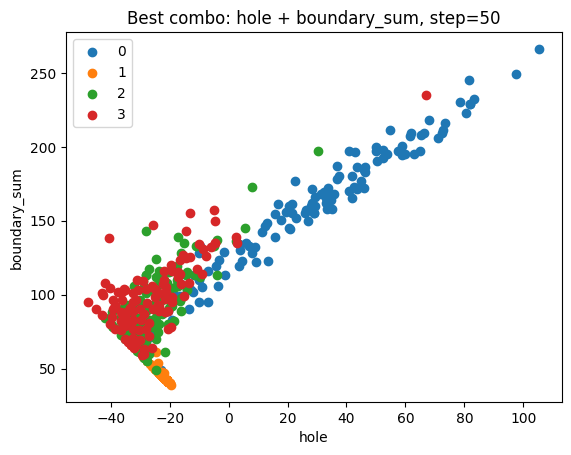


Experiment summary (top 5 by Min-Max normalized accuracy):
 sample_step            features  acc_baseline_no_transform  acc_no_norm  acc_minmax  acc_zscore
          50 hole + boundary_sum                      82.14        82.14       83.33       83.33
         100     hole + boundary                      76.19        76.19       80.95       78.57
         100     hole + boundary                      76.19        76.19       80.95       78.57
         100     hole + boundary                      76.19        80.95       80.95       78.57
          50     hole + boundary                      78.57        79.76       80.95       82.14


In [24]:
#%%
# Transforming data using linear algebra — UPDATED with experiments
# Module 1, Lab 4 (parameters changed + experiments)
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
import itertools
import pandas as pd

#%%
# Helper plotting & utilities (same as before)
def plotGrid(transform, unit, linestyle=":", fig=None, ax=None):
    lim1 = -100
    lim2 = 100

    def mat2xy(start, end):
        if len(start.shape) == 1:
            start = np.expand_dims(start, 0)
            end = np.expand_dims(end, 0)
        nan = np.ones(len(start)) * np.nan
        x = np.stack((start[:, 0], end[:, 0], nan)).T.reshape(-1)
        y = np.stack((start[:, 1], end[:, 1], nan)).T.reshape(-1)
        return x, y

    def parallellines(axis, addend, lines, unit):
        addend = np.repeat(np.expand_dims(addend, 0), lines * 2, 0)
        unit = np.expand_dims(np.arange(-lines, lines) * unit, 1)
        unit = unit - lines
        addend = addend * unit
        lines = np.expand_dims(axis, 0) + addend
        return np.concatenate((lines, lines * -1))

    if fig is None:
        fig, ax = plt.subplots(figsize=(5, 5))
    transform = transform.astype(float)
    xaxis = transform[0]
    yaxis = transform[1]

    # plot lines parallel to the x axis
    lines1 = parallellines(xaxis * lim1, yaxis, 100, unit)
    lines2 = parallellines(xaxis * lim2, yaxis, 100, unit)
    x, y = mat2xy(lines1, lines2)
    plt.plot(x, y, linestyle + "k", linewidth=0.5)
    # plot x axis
    x, y = mat2xy(xaxis * lim1, xaxis * lim2)
    plt.plot(x, y, linestyle, color="#440077")

    # plot lines parallel to the y axis
    lines1 = parallellines(yaxis * lim1, xaxis, 100, unit)
    lines2 = parallellines(yaxis * lim2, xaxis, 100, unit)
    x, y = mat2xy(lines1, lines2)
    plt.plot(x, y, linestyle + "k", linewidth=0.5)
    # plot y axis
    x, y = mat2xy(yaxis * lim1, yaxis * lim2)
    plt.plot(x, y, linestyle, color="#aa5500")

    return fig, ax

def plotData(X, y, xlabel="feat1", ylabel="feat2", fig=None, ax=None):
    if fig is None:
        fig, ax = plt.subplots()
    nclasses_local = len(np.unique(y))
    for ii in range(nclasses_local):
        plt.scatter(X[y == ii, 0], X[y == ii, 1])
    plt.legend([str(i) for i in range(nclasses_local)])
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    return fig, ax

#%%
# NN helpers
def NN1(traindata, trainlabel, query):
    diff = traindata - query
    sq = diff * diff
    dist = sq.sum(1)
    label = trainlabel[np.argmin(dist)]
    return label

def NN(traindata, trainlabel, testdata):
    predlabel = np.array([NN1(traindata, trainlabel, i) for i in testdata])
    return predlabel

def Accuracy(gtlabel, predlabel):
    assert len(gtlabel) == len(predlabel)
    correct = (gtlabel == predlabel).sum()
    return correct / len(gtlabel)

#%%
# Image processing utilities (hole/boundary/hull/sum)
def cumArray(img):
    img2 = img.copy()
    for ii in range(1, img2.shape[1]):
        img2[ii, :] = img2[ii, :] + img2[ii - 1, :]
    img2 = img2 > 0
    return img2

def getHolePixels(img):
    im1 = cumArray(img)
    im2 = np.rot90(cumArray(np.rot90(img)), 3)
    im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
    im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
    hull = im1 & im2 & im3 & im4
    hole = hull & ~(img > 0)
    return hole

def getHullPixels(img):
    im1 = cumArray(img)
    im2 = np.rot90(cumArray(np.rot90(img)), 3)
    im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
    im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
    hull = im1 & im2 & im3 & im4
    return hull

def minus(a, b):
    return a & ~b

def getBoundaryPixels(img):
    img = img.copy() > 0
    rshift = np.roll(img, 1, 1)
    lshift = np.roll(img, -1, 1)
    ushift = np.roll(img, -1, 0)
    dshift = np.roll(img, 1, 0)
    boundary = (
        minus(img, rshift)
        | minus(img, lshift)
        | minus(img, ushift)
        | minus(img, dshift)
    )
    return boundary

#%%
# Normalization utilities (apply train-fit to test)
def rescale_train_apply(train_feat, test_feat):
    tmin = train_feat.min()
    tmax = train_feat.max()
    denom = (tmax - tmin) if (tmax - tmin) != 0 else 1.0
    return (train_feat - tmin) / denom, (test_feat - tmin) / denom

def zscore_train_apply(train_feat, test_feat):
    mu = train_feat.mean()
    sigma = train_feat.std()
    sigma = sigma if sigma != 0 else 1.0
    return (train_feat - mu) / sigma, (test_feat - mu) / sigma

#%%
# Load MNIST dataset (only classes 0-3 for quicker experiments)
(train_X, train_y), (test_X, test_y) = mnist.load_data()
train_X = train_X / 255.0
test_X = test_X / 255.0

nclasses = 4
train_mask = train_y < nclasses
test_mask = test_y < nclasses

train_X = train_X[train_mask].copy()
train_y = train_y[train_mask].copy()
test_X = test_X[test_mask].copy()
test_y = test_y[test_mask].copy()

#%% PARAMETERS WE WILL VARY (changed from original)
sample_steps = [100, 50]        # how aggressively we sample training/test sets (original was 100 only)
feature_combinations = [
    ("hole", "boundary"),
    ("hull", "boundary"),
    ("hole", "hull"),
    ("hole", "boundary_sum")  # boundary + sum combined as second feature
]
# several transformation matrices to try (including identity)
transform_list = [
    np.array([[1.0, 0.0], [0.0, 1.0]]),     # identity
    np.array([[0.5, -0.5], [0.0, 2.5]]),    # original example
    np.array([[2.0, 0.0], [0.0, 0.5]]),     # scale x up, y down
    np.array([[1.0, 1.0], [-0.5, 1.0]]),    # shear + rotation-ish
]

#%%
# Precompute all possible features so we can combine them quickly
# features: hole, boundary, hull, sum(pixel intensity)
feat_store = {}
feat_store['hole_train'] = np.array([getHolePixels(i).sum() for i in train_X])
feat_store['hole_test']  = np.array([getHolePixels(i).sum() for i in test_X])
feat_store['boundary_train'] = np.array([getBoundaryPixels(i).sum() for i in train_X])
feat_store['boundary_test']  = np.array([getBoundaryPixels(i).sum() for i in test_X])
feat_store['hull_train'] = np.array([getHullPixels(i).sum() for i in train_X])
feat_store['hull_test']  = np.array([getHullPixels(i).sum() for i in test_X])
feat_store['sum_train'] = np.sum(train_X, axis=(1,2)) / (28*28)
feat_store['sum_test']  = np.sum(test_X, axis=(1,2)) / (28*28)

#%%
# Run experiments across parameter grid and collect results
results = []
for step in sample_steps:
    # sample train/test
    trX = train_X[::step].copy()
    trY = train_y[::step].copy()
    teX = test_X[::step].copy()
    teY = test_y[::step].copy()

    # extract precomputed features for this subset (we reuse the same indices since precomputed arrays were on full)
    idx_train = np.arange(0, train_X.shape[0], step)
    idx_test = np.arange(0, test_X.shape[0], step)

    for feats in feature_combinations:
        # build 2D features according to combination
        def build_feats(feat_pair, idxs, kind):
            # kind: 'train' or 'test'
            a, b = feat_pair
            def get(name):
                if name == 'hole': return feat_store['hole_'+kind][idxs]
                if name == 'boundary': return feat_store['boundary_'+kind][idxs]
                if name == 'hull': return feat_store['hull_'+kind][idxs]
                if name == 'sum': return feat_store['sum_'+kind][idxs]
                if name == 'boundary_sum':
                    # second feature = boundary + sum (experiment)
                    return feat_store['boundary_'+kind][idxs] + feat_store['sum_'+kind][idxs]
                raise ValueError("unknown feature")
            return np.vstack((get(a), get(b))).T

        train_feats = build_feats(feats, idx_train, 'train')
        test_feats  = build_feats(feats, idx_test, 'test')

        # baseline (no transform, no normalization)
        pred_base = NN(train_feats, trY, test_feats)
        acc_base = Accuracy(teY, pred_base)

        # try transforms (applied BEFORE normalization experiments)
        for tmat in transform_list:
            # apply transform
            train_t = np.matmul(train_feats, tmat)
            test_t = np.matmul(test_feats, tmat)

            # compute accuracy without normalization
            pred_t = NN(train_t, trY, test_t)
            acc_t = Accuracy(teY, pred_t)

            # Now try normalization strategies: min-max (rescale) and z-score
            # Min-max scaling (fit on train features separately per column)
            # apply per-dimension rescaling using training mins/maxs
            train_res = np.zeros_like(train_feats, dtype=float)
            test_res = np.zeros_like(test_feats, dtype=float)
            for dim in [0,1]:
                tr_col = train_t[:, dim]
                te_col = test_t[:, dim]
                tr_res, te_res = rescale_train_apply(tr_col, te_col)
                train_res[:, dim] = tr_res
                test_res[:, dim] = te_res
            pred_res = NN(train_res, trY, test_res)
            acc_res = Accuracy(teY, pred_res)

            # z-score
            train_z = np.zeros_like(train_feats, dtype=float)
            test_z = np.zeros_like(test_feats, dtype=float)
            for dim in [0,1]:
                tr_col = train_t[:, dim]
                te_col = test_t[:, dim]
                tr_z, te_z = zscore_train_apply(tr_col, te_col)
                train_z[:, dim] = tr_z
                test_z[:, dim] = te_z
            pred_z = NN(train_z, trY, test_z)
            acc_z = Accuracy(teY, pred_z)

            # record results
            results.append({
                "sample_step": step,
                "features": f"{feats[0]} + {feats[1]}",
                "transform": tmat.tolist(),
                "acc_no_norm": acc_t,
                "acc_minmax": acc_res,
                "acc_zscore": acc_z,
                "acc_baseline_no_transform": acc_base
            })

#%% Summarize experiments in a DataFrame and print top results
df = pd.DataFrame(results)
# convert to percentage
for col in ["acc_no_norm", "acc_minmax", "acc_zscore", "acc_baseline_no_transform"]:
    df[col] = (df[col] * 100).round(2)

# show best rows by minmax normalized accuracy
df_sorted = df.sort_values(by="acc_minmax", ascending=False).reset_index(drop=True)
pd.set_option('display.max_columns', None)
print("Top 10 results sorted by Min-Max normalized accuracy:")
print(df_sorted.head(10).to_string(index=False))

# save to CSV in case you want to inspect later
df_sorted.to_csv("mnist_transform_experiments_results.csv", index=False)
print("\nSaved full results to 'mnist_transform_experiments_results.csv'")

#%%
# Quick visual sample: plot one of best combos (first row)
best_row = df_sorted.iloc[0]
best_feats_str = best_row['features']
best_transform = np.array(best_row['transform'])
step = int(best_row['sample_step'])

# reconstruct data for plotting
idx_train = np.arange(0, train_X.shape[0], step)
idx_test = np.arange(0, test_X.shape[0], step)
# parse feature names
a_name, _, b_name = best_feats_str.partition(" + ")
def get_feat_array(name, kind, idxs):
    if name == 'hole': return feat_store['hole_'+kind][idxs]
    if name == 'boundary': return feat_store['boundary_'+kind][idxs]
    if name == 'hull': return feat_store['hull_'+kind][idxs]
    if name == 'boundary_sum': return feat_store['boundary_'+kind][idxs] + feat_store['sum_'+kind][idxs]
    if name == 'sum': return feat_store['sum_'+kind][idxs]
    raise ValueError("unknown")

train_feats_plot = np.vstack((get_feat_array(a_name, 'train', idx_train),
                              get_feat_array(b_name, 'train', idx_train))).T
test_feats_plot  = np.vstack((get_feat_array(a_name, 'test', idx_test),
                              get_feat_array(b_name, 'test', idx_test))).T

train_t_plot = np.matmul(train_feats_plot, best_transform)
test_t_plot  = np.matmul(test_feats_plot, best_transform)

fig, ax = plotData(train_t_plot, train_y[::step], xlabel=a_name, ylabel=b_name)
ax.set_title(f"Best combo: {best_feats_str}, step={step}")
plt.show()

print("\nExperiment summary (top 5 by Min-Max normalized accuracy):")
print(df_sorted[['sample_step','features','acc_baseline_no_transform','acc_no_norm','acc_minmax','acc_zscore']].head(5).to_string(index=False))


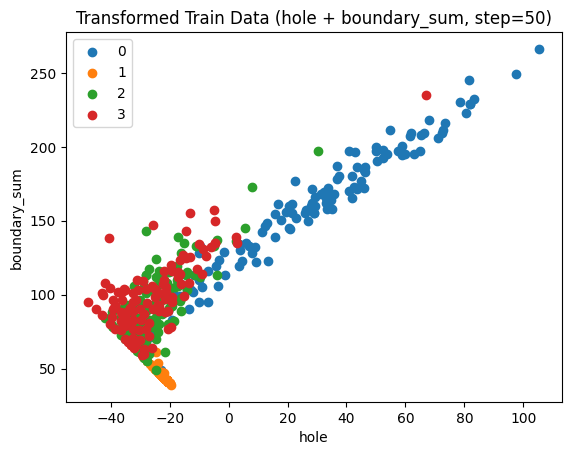

In [27]:
idx_train = np.arange(0, train_X.shape[0], step)
# Reconstruct train_feats_t using best parameters
a_name, _, b_name = best_feats_str.partition(" + ")
train_feats_plot = np.vstack((get_feat_array(a_name, 'train', idx_train),
                              get_feat_array(b_name, 'train', idx_train))).T
train_feats_t = np.matmul(train_feats_plot, best_transform)

fig, ax = plotData(train_feats_t, train_y[::step], xlabel=a_name, ylabel=b_name)
ax.set_title(f"Transformed Train Data ({best_feats_str}, step={step})") # Add a title for clarity
# ax.set_xlim(xlim) # xlim and ylim were not defined, commenting out
# ax.set_ylim(ylim) # xlim and ylim were not defined, commenting out
plt.show()

## Questions:
1. Experiment with different transformation matrices and check the accuracy
2. Will the same transform used for these two features also work for other features?

> Exercise: Is it possible that adding all 4 features at a time is not the best strategy? Can you think of a better combination of features that can help in improving the accuracy of the model? Maybe you can try adding 2 features at a time and see if that helps.

This type of rescaling makes all the features between 0 and 1.

Let us calculate the accuracy obtained by this transform:



### 📝 Exercise Ideas

1. **Experiment with transforms:** Try [[2, 0], [0, 0.5]] - what happens to accuracy?
2. **Mix normalization + transformation:** First rescale, then transform
3. **Try other features:** Use hull pixels + sum instead of holes + boundary
4. **Z-score normalization:** Implement $(x - \mu) / \sigma$ and compare results
5. **Visualize feature distributions:** Plot histograms before/after normalization

In [32]:
#1
T = np.array([[2, 0], [0, 0.5]])
X_transformed = (T @ train_feats.T).T
idx_train = np.arange(0, train_X.shape[0], step)
idx_test = np.arange(0, test_X.shape[0], step)
a_name, _, b_name = best_feats_str.partition(" + ")
def get_feat_array(name, kind, idxs):
    if name == 'hole': return feat_store['hole_'+kind][idxs]
    if name == 'boundary': return feat_store['boundary_'+kind][idxs]
    if name == 'hull': return feat_store['hull_'+kind][idxs]
    if name == 'boundary_sum': return feat_store['boundary_'+kind][idxs] + feat_store['sum_'+kind][idxs]
    if name == 'sum': return feat_store['sum_'+kind][idxs]
    raise ValueError("unknown")

train_feats = np.vstack((get_feat_array(a_name, 'train', idx_train),
                         get_feat_array(b_name, 'train', idx_train))).T
test_feats  = np.vstack((get_feat_array(a_name, 'test', idx_test),
                         get_feat_array(b_name, 'test', idx_test))).T

train_feats_transformed = (T @ train_feats.T).T
test_feats_transformed = (T @ test_feats.T).T
acc_scaled = Accuracy(teY, NN(train_feats_transformed, trY, test_feats_transformed))
print("Accuracy after transform [[2,0],[0,0.5]] =", acc_scaled)

Accuracy after transform [[2,0],[0,0.5]] = 0.8095238095238095


## Expected Observation

Accuracy may decrease slightly if the scaling breaks the feature relationships.

If your model or features are invariant to scale (e.g. normalized or tree-based), accuracy may stay similar.

## 2 Combine both steps:

Normalize each feature (so it has mean 0, std 1).

Apply a linear transform (like the one above).

In [35]:
T = np.array([[2, 0], [0, 0.5]])
train_feats_mixed = (T @ train_feats_rescaled.T).T
test_feats_mixed = (T @ test_feats_rescaled.T).T
acc_mix = Accuracy(teY, NN(train_feats_mixed, trY, test_feats_mixed))
print("Accuracy after normalization + transform =", acc_mix)

Accuracy after normalization + transform = 0.7738095238095238


In [39]:
#3
train_hull_feats = get_feat_array('hull', 'train', idx_train)
train_sum_feats = get_feat_array('sum', 'train', idx_train)
test_hull_feats = get_feat_array('hull', 'test', idx_test)
test_sum_feats = get_feat_array('sum', 'test', idx_test)
train_feats_hull_sum = np.vstack((train_hull_feats, train_sum_feats)).T
test_feats_hull_sum = np.vstack((test_hull_feats, test_sum_feats)).T
acc_hull_sum = Accuracy(teY, NN(train_feats_hull_sum, trY, test_feats_hull_sum))
print("Accuracy using Hull + Sum =", acc_hull_sum)

Accuracy using Hull + Sum = 0.6785714285714286


In [41]:
#4
train_feats_zscored = np.zeros_like(train_feats, dtype=float)
test_feats_zscored = np.zeros_like(test_feats, dtype=float)
for dim in [0, 1]:
    tr_col = train_feats[:, dim]
    te_col = test_feats[:, dim]
    tr_z, te_z = zscore_train_apply(tr_col, te_col)
    train_feats_zscored[:, dim] = tr_z
    test_feats_zscored[:, dim] = te_z
acc_z = Accuracy(teY, NN(train_feats_zscored, trY, test_feats_zscored))
print("Accuracy after Z-score normalization =", acc_z)

Accuracy after Z-score normalization = 0.8095238095238095


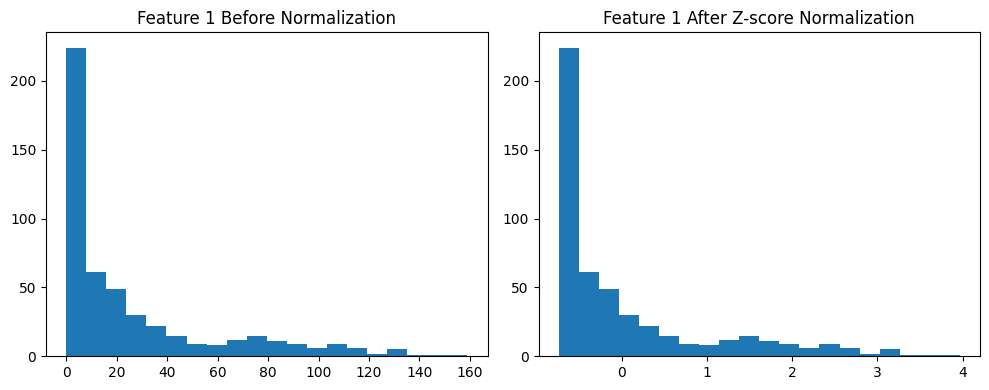

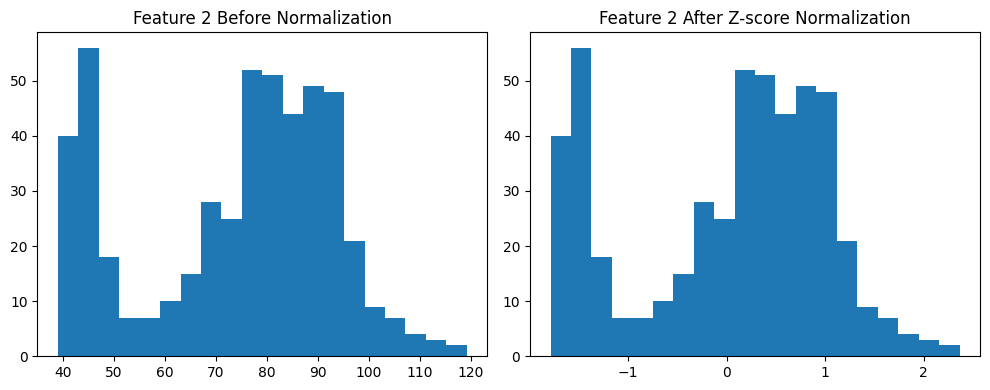

In [43]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))
axes[0].hist(train_feats[:,0], bins=20)
axes[0].set_title('Feature 1 Before Normalization')
axes[1].hist(train_feats_zscored[:,0], bins=20)
axes[1].set_title('Feature 1 After Z-score Normalization')
plt.tight_layout()
plt.show()
fig, axes = plt.subplots(1, 2, figsize=(10,4))
axes[0].hist(train_feats[:,1], bins=20)
axes[0].set_title('Feature 2 Before Normalization')
axes[1].hist(train_feats_zscored[:,1], bins=20)
axes[1].set_title('Feature 2 After Z-score Normalization')
plt.tight_layout()
plt.show()